In [2]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Scaling 
x_train = x_train / 255
x_test = x_test / 255

5


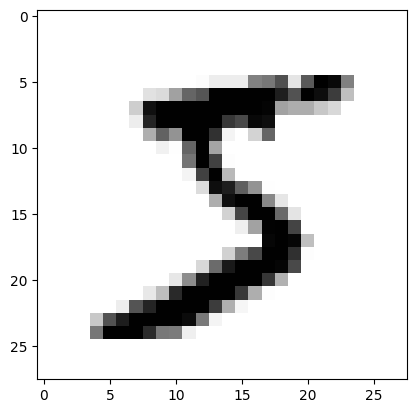

In [13]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
print(y_train[0])

In [14]:
# Flatten 
x_train_flat = x_train.reshape(len(x_train), (28 * 28))
x_test_flat = x_test.reshape(len(x_test), (28 * 28))

In [15]:
x_train_flat.shape

(60000, 784)

In [16]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 588us/step - accuracy: 0.7869 - loss: 0.8934
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.9613 - loss: 0.1416
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.9762 - loss: 0.0838
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9823 - loss: 0.0603
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9869 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9912 - loss: 0.0329
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9906 - loss: 0.0302
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9935 - loss: 0.0221
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9942 - loss: 0.0185
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9950 - loss: 0.0170


In [19]:
y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


<Axes: >

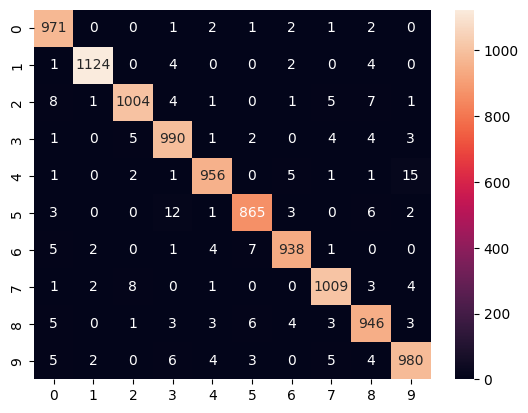

In [21]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt='d')